In [2]:
import csv
from matplotlib import pyplot as plt
import numpy as np
from scipy.misc import imread
import pickle
import cv2
from sklearn import linear_model
import seaborn as sns
import warnings
from jupyterthemes import jtplot
%matplotlib inline
jtplot.style()
sns.set_context("poster")
warnings.filterwarnings("ignore")

In [3]:
def f_curve(x, curve):
    output = 0
    for i in range(len(curve)):
        output += curve[-i -1] * x**i
    return output

[-0.022  1.   ]


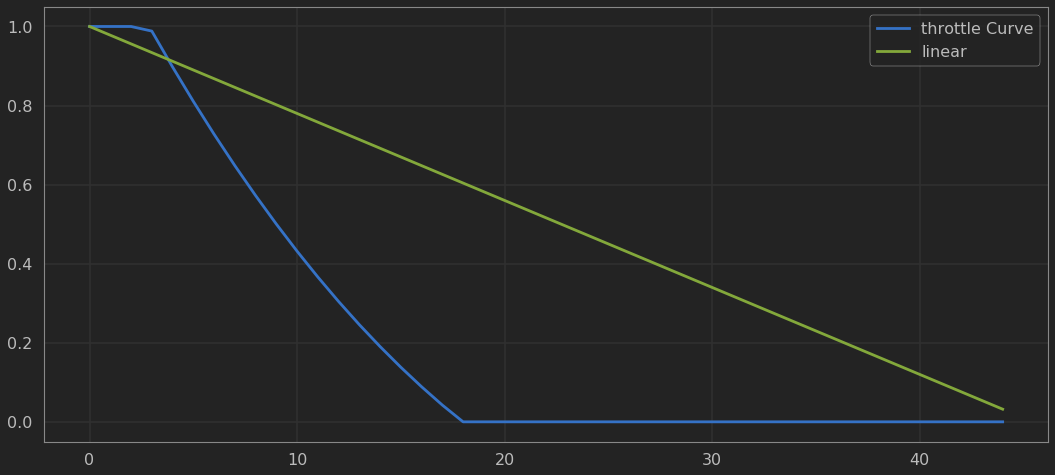

In [4]:
#RPM mapping
y_fit = [1.6, .6, .4, 0, -.5, -1]
x_fit = [0,   3,  10, 25, 35, 100]
curve = np.polyfit(x_fit, y_fit, 3)
linear = np.polyfit([0,45],[1,.01], 1)
X = np.arange(45)

def calc_rpm_output(angle, curve):
    output = f_curve(angle, curve)
    output = min(1, output)
    output = max(0, output)
    return output
print(linear)
def linear_rpm_output(angle):
    return f_curve(angle, linear)

y = [calc_rpm_output(angle, curve) for angle in X]
plt.figure(figsize=(18,8))
plt.plot(X, y, label="throttle Curve")
plt.plot(X, [linear_rpm_output(x) for x in X], label="linear")
plt.legend()
plt.show()

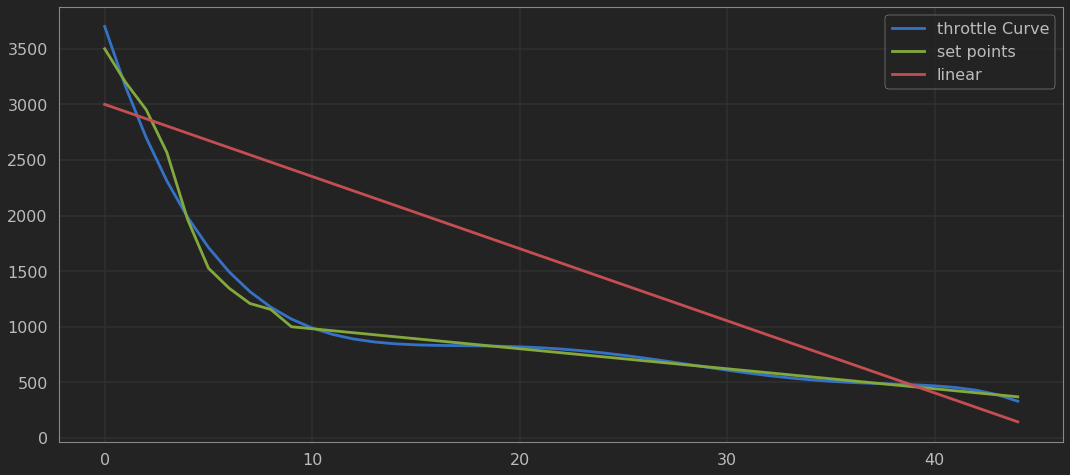

In [24]:
y_fit = [3500,3200,2952,2566,1963,1527,1346,1209,1156,1000,
         982, 964, 946, 928, 910, 892, 874, 856, 838, 820, 
         802, 784, 766, 748, 730, 712, 694, 676, 658, 640, 
         622, 604, 586, 568, 550, 532, 514, 496, 478, 460, 
         442, 424, 406, 388, 370]
x_fit = np.arange(45)
curve = np.polyfit(x_fit, y_fit, 6)
linear = np.polyfit([0,45],[3000,80], 1)
X = np.arange(45)
y = [f_curve(angle, curve) for angle in X]
plt.figure(figsize=(18,8))
plt.plot(X, y, label="throttle Curve")
plt.plot(X, y_fit, label="set points")
plt.plot(X, [linear_rpm_output(x) for x in X], label="linear")
plt.legend()
plt.show()

In [23]:
print([1000 - 18 * x for x in range(1,36)])

[982, 964, 946, 928, 910, 892, 874, 856, 838, 820, 802, 784, 766, 748, 730, 712, 694, 676, 658, 640, 622, 604, 586, 568, 550, 532, 514, 496, 478, 460, 442, 424, 406, 388, 370]


In [22]:
650/35

18.571428571428573

[ 0.00033333  0.        ]


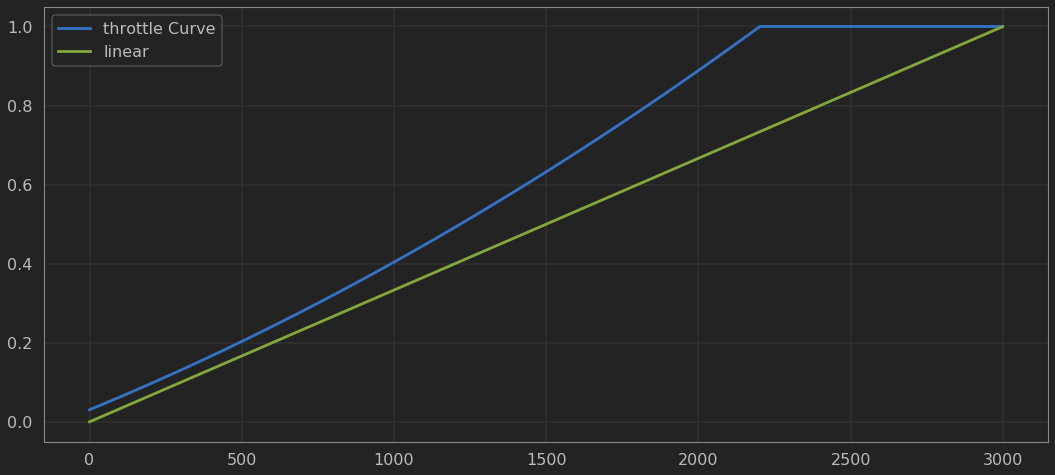

In [12]:
#delta RPM to acceleration mapping
y_fit = [0, .1, .2, .3, .4,  1]
x_fit = [0, 100,  500, 750, 1000, 2200]
curve = np.polyfit(x_fit, y_fit, 2)
linear = np.polyfit([0, 3000],[0,1], 1)
X = np.arange(3000)

def calc_rpm_output(angle, curve):
    output = f_curve(angle, curve)
    output = min(1, output)
    output = max(0, output)
    return output
print(linear)
def linear_rpm_output(angle):
    return f_curve(angle, linear)

y = [calc_rpm_output(angle, curve) for angle in X]
plt.figure(figsize=(18,8))
plt.plot(X, y, label="throttle Curve")
plt.plot(X, [linear_rpm_output(x) for x in X], label="linear")
plt.legend()
plt.show()

[ 0.001  0.   ]


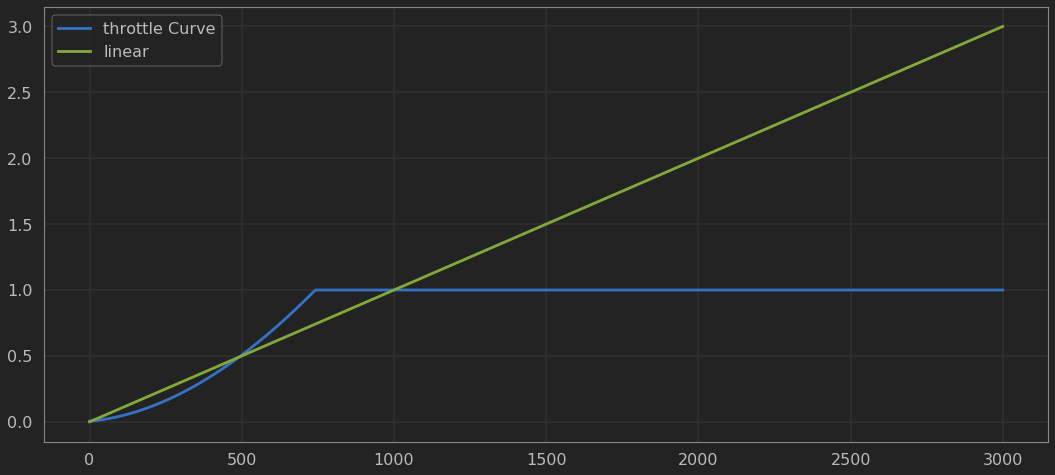

In [37]:
#delta RPM to deceleration mapping
y_fit = [0, 0, .02, .03, .09,  .3,  .5, .8]
x_fit = [-10, 15,  25, 50, 200, 350, 500, 7000]
curve = np.polyfit(x_fit, y_fit, 3)
linear = np.polyfit([0, 1000],[0,1], 1)
X = np.arange(3000)

def calc_rpm_output(angle):
    output = f_curve(angle, curve)
    output = min(1, output)
    output = max(0, output)
    return output
print(linear)
def linear_rpm_output(angle):
    return f_curve(angle, linear)

y = [calc_rpm_output(angle) for angle in X]
plt.figure(figsize=(18,8))
plt.plot(X, y, label="throttle Curve")
plt.plot(X, [linear_rpm_output(x) for x in X], label="linear")
plt.legend()
plt.show()

In [125]:
from collections import namedtuple
Point = namedtuple("Point", ["lat","lng"])
SessionPoint = namedtuple("SessionPoint", ["sessionid", "point"])
p = SessionPoint("asdfasdf", Point(1234,1234))

In [127]:
p.point.lat


1234